In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Meta Information

The prima indian diabete dataset consists of eight medical predictor variables and one target variable, Class contains whether the person tested positive or negative for it<br>
The Predictor variables includes<br>
the number of pregnancies the patient has had their BMI, insulin level, age, and so on. These are all numeric

In [2]:
from scipy.io.arff import loadarff
data, metadata = loadarff('diabetes.arff')
df = pd.DataFrame(data)
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,b'tested_positive'
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,b'tested_negative'
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,b'tested_positive'
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,b'tested_negative'
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,b'tested_positive'
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,b'tested_negative'
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,b'tested_negative'
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,b'tested_negative'
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,b'tested_positive'


### Q10: Compute mean & standard deviation , tabulate and visualize the age of the patients.

In [3]:
df['age'].describe()[1:3]

mean    33.240885
std     11.760232
Name: age, dtype: float64

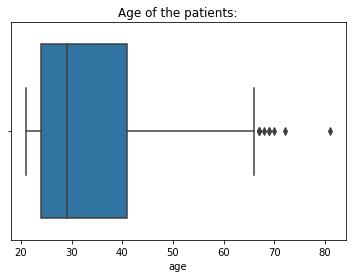

In [4]:
sns.boxplot(x = df['age'])
plt.title('Age of the patients:')
plt.show()

### Q11: Analyze and tabulate the relationship of age,BMI of patientswith respect to the class.

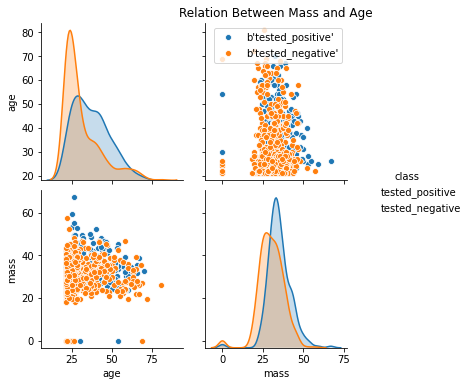

In [5]:
sns.pairplot(df[['age', 'mass', 'class']], hue = 'class')
plt.title("Relation Between Mass and Age")
plt.legend()
plt.show()

Both the negative and positive classes cannot be differentiated just using these two metrics since the distribution is nearly identical. 

### Q12: Tabulate the class label and comment on whether the classes are balanced.

In [6]:
df['class'].value_counts()

b'tested_negative'    500
b'tested_positive'    268
Name: class, dtype: int64

The class is imbalanced as there are twice as many negatives as compared to the positives

In [7]:
df = df.replace(to_replace = b'tested_positive',
                 value ="positive")
df = df.replace(to_replace = b'tested_negative' ,
                 value ="negative")

### Q13: Use the data set to build a logistic regression model (using sklearn) and predict the class label. Divide the dataset into training and test set (70,30) using train_test_splitmethod in sklearn. 

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression()
X = df[['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']]
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size = 0.3, random_state = 20)

### Q14: Use the test data set and evaluate the performance using a confusion matrix. Visualize the confusion matrix using a heat map.

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
model.fit(x_train, y_train)
predicted = model.predict(x_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

    negative       0.79      0.87      0.83       153
    positive       0.68      0.54      0.60        78

    accuracy                           0.76       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


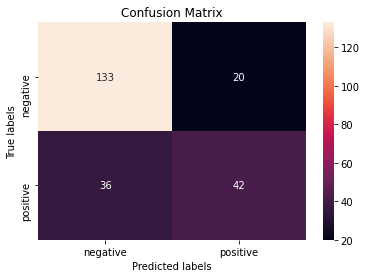

In [10]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, predicted)
ax = plt.subplot()
sns.heatmap(confusion, annot = True, fmt = "0.0f")
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

### Q15: Compute accuracy rate, true positive and true negative rate and comment on the performance.

In [11]:
TPR = confusion[1,1]/(confusion[1,1]+confusion[1,0])
TNR = confusion[0,0]/(confusion[0,0]+confusion[0,1])
ACR = (confusion[1,1] + confusion[0,0])/(confusion[0,1] + confusion[1,0] + confusion[1,1] + confusion[0,0])
print("Accuracy Rate", ACR)
print("True Positive Rate", TPR)
print("True Negative Rate", TNR)                                                                           

Accuracy Rate 0.7575757575757576
True Positive Rate 0.5384615384615384
True Negative Rate 0.869281045751634


The accuracy rate is 75% which is good.<br> 
The true positive rate is 54% which isnt good but this is mainly because of the imbalance in the class as we have 2x as many negative samples<br>
The True Negative rate is 87% which is really good. 

### Q16: Visualize the ROC curve, and comment on the performance of the classifier.

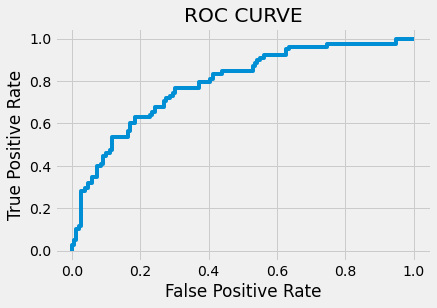

In [12]:
from sklearn.metrics import roc_curve
y_test = pd.DataFrame(y_test)
y_test.replace(["positive", "negative"], [1 ,0], inplace = True)
probs = model.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test,  probs[:,1])
plt.style.use('fivethirtyeight')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
# plt.legend(loc=4)
plt.show()

As shown graphically above, as shown from the ROC, the classifier works well as the TPR increases at a faster rate than the FPR. <br>
Moreover, the accuracy rate of the classifier is good as well and hence,<br>
this model works well with the data given<br>
However, the number of false negatives is quite high and not good since we dont want to predict that someone does not have diabetes when they actually do have it. 